In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import scipy.stats as sps

from sklearn.datasets import load_iris

In [2]:
# Получаем данные

data = load_iris()["data"]
target = load_iris()["target"]
datas = [[], [], []]
for index in range(len(data)):
    datas[target[index]].append(data[index])
for i in range(3):
    datas[i] = np.array(datas[i])

In [3]:
# Оказалось, в каждой выборке по 50 элементов
N = len(datas[0]) # == len(datas[1]), == len(datas[2]))

In [4]:
# Считаем матожидания

As = [[np.mean(np.array([datas[k][j][i] for j in range(N)])) for i in range(4)] for k in range(3)]
As = np.array(As)

print(As)

[[ 5.006  3.418  1.464  0.244]
 [ 5.936  2.77   4.26   1.326]
 [ 6.588  2.974  5.552  2.026]]


In [5]:
# Считаем матрицы ковариаций
sigmas = []
for number in range(3):
    sigmas.append([[
            np.mean(np.array([datas[number][index][i] * datas[number][index][j] for index in range(N)])) -
            np.mean(np.array([datas[number][index][i] for index in range(N)])) *
            np.mean(np.array([datas[number][index][j] for index in range(N)]))
            for i in range(4)
        ] for j in range(4)
    ])
sigmas = np.array(sigmas)

print(sigmas)

[[[ 0.121764  0.098292  0.015816  0.010336]
  [ 0.098292  0.142276  0.011448  0.011208]
  [ 0.015816  0.011448  0.029504  0.005584]
  [ 0.010336  0.011208  0.005584  0.011264]]

 [[ 0.261104  0.08348   0.17924   0.054664]
  [ 0.08348   0.0965    0.081     0.04038 ]
  [ 0.17924   0.081     0.2164    0.07164 ]
  [ 0.054664  0.04038   0.07164   0.038324]]

 [[ 0.396256  0.091888  0.297224  0.048112]
  [ 0.091888  0.101924  0.069952  0.046676]
  [ 0.297224  0.069952  0.298496  0.047848]
  [ 0.048112  0.046676  0.047848  0.073924]]]


Итак, получили, что
$$
\bar{a_1} = \left(\begin{array}{cc}5.006\\3.418\\1.464\\0.244\end{array}\right)
,\ 
\Sigma_1 = \left(\begin{array}{cc}
0.121764&0.098292&0.015816&0.010336\\
0.098292&0.142276&0.011448&0.0112\\
0.015816&0.011448&0.029504&0.005584\\
0.010336&0.011208&0.005584&0.011264
\end{array}\right)
$$
$$
\bar{a_2} = \left(\begin{array}{cc}5.936\\2.77\\4.26\\1.326\end{array}\right)
,\ 
\Sigma_2 = \left(\begin{array}{cc}
0.261104&0.08348&0.17924&0.054664\\
0.08348&0.0965&0.081&0.04038\\
0.17924&0.081&0.2164&0.07164\\
0.054664&0.04038&0.07164&0.038324
\end{array}\right)
$$
$$
\bar{a_3} = \left(\begin{array}{cc}6.588\\2.974\\5.552\\2.026\end{array}\right)
,\ 
\Sigma_3 = \left(\begin{array}{cc}
0.396256&0.091888&0.297224&0.048112\\
0.091888&0.101924&0.069952&0.046676\\
0.297224&0.069952&0.298496&0.047848\\
0.048112&0.046676&0.047848&0.073924
\end{array}\right)
$$

В качестве $\bar{a}$ и $\Sigma$ для пар компонент нужно брать соответствующие им проекции имеющихся векторов $\bar{a_1},\ \bar{a_2},\ \bar{a_3}$ и подматрицы матриц $\Sigma_1,\ \Sigma_2,\ \Sigma_3$

При этом помним, что потность для гауссовского вектора $\bar{\xi}$ c вектором матожиданий $\bar{a}$ и матрицей ковариаций $\Sigma$ имеет вид:

$$p_{\bar{\xi}}(\bar{x}) = \frac{1}{(2\pi)^{\frac{n}{2}}{|\Sigma|}^{\frac{1}{2}}}e^{-\frac{1}{2}(\bar{x}-\bar{a})^{T}\Sigma^{-1}(\bar{x}-\bar{a})}, \bar{x}\in R^n$$

В нашем случае формула немного упрощается.

$$p_{\bar{\xi}}(\bar{t}) = \frac{1}{2\pi{|\Sigma|}^{\frac{1}{2}}}e^{-\frac{1}{2}(\bar{t}-\bar{a})^{T}\Sigma^{-1}(\bar{t}-\bar{a})}, \bar{t}=\left(\begin{array}{cc}x\\y\end{array}\right)
$$

Далее выяснилось, что она не нужна и плотность можно взять scipy

In [6]:
# Возвражает диагнальную подматрицу
def getSubMatrix(matrix, i, j):
    return np.array([line[i:j] for line in matrix][i:j])

# Это костыль
def modify(matrix):
    return np.array([[matrix[1][1], matrix[0][1]], [matrix[1][0], matrix[1][1]]])

In [7]:
def paintGraphic(a, sigma, xData, yData, k, i):
    
    radius = 1.5
    xmin, xmax, ymin, ymax = a[0] - radius, a[0] + radius, a[1] - radius, a[1] + radius

    # Чтобы выборка правилно ложилась на график плотности,
    # приходится передавать в scipy матрицу, отраженную отонситально побочной диагонали
    sigma = modify(sigma)
    
    grid = np.mgrid[xmin:xmax:0.05, ymin:ymax:0.05]
    density = np.array([[
                sps.multivariate_normal.pdf(
                        (grid[0, i, j], grid[1, i, j]), a, cov=sigma
                )
                for i in range(grid[0].shape[0])
            ]
            for j in range(grid[0].shape[1])
        ]
    )

    figure = plt.figure(figsize=(10,10))

    figure.add_subplot(1, 1, 1)
    CS = plt.contour(grid[0], grid[1], density, [0.001, 0.05, 0.2, 0.5, 0.9])  # Рисуем с линиями уровня
    plt.clabel(CS, fontsize=14, inline=1)
    
    plt.scatter(xData, yData, alpha=0.2)  # alpha - прозрачность точки
    
    plt.title(r"k={}, ({}, {})".format(k, i, i + 1))

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    plt.show()

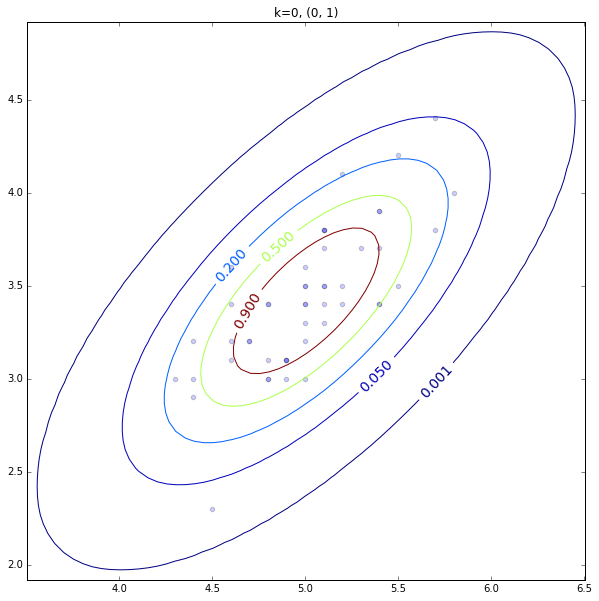

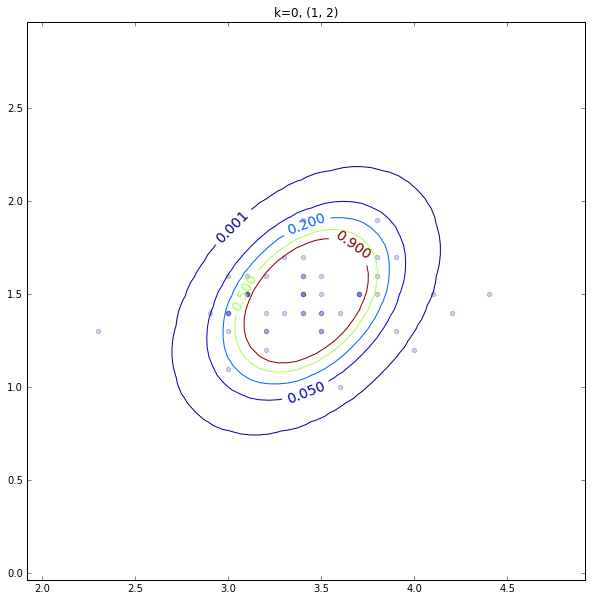

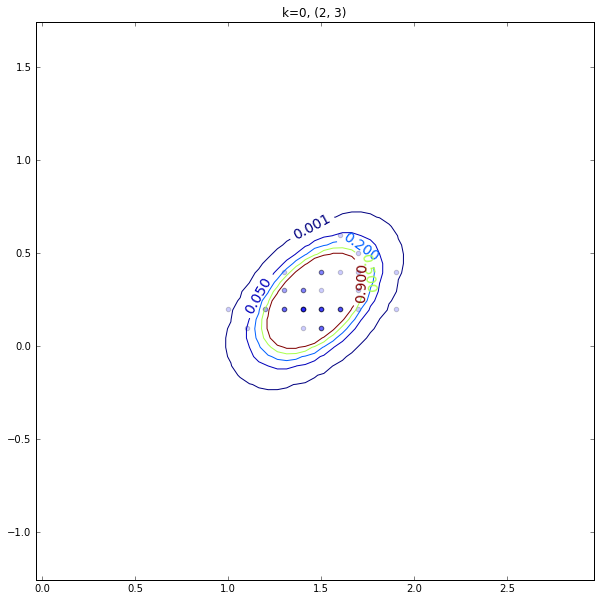

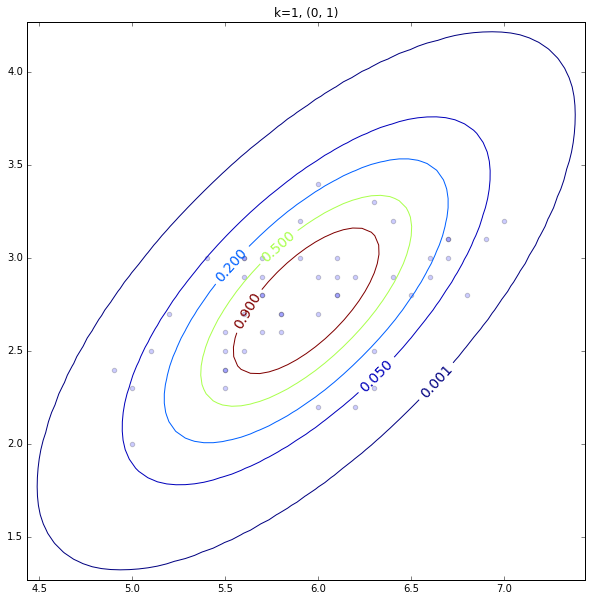

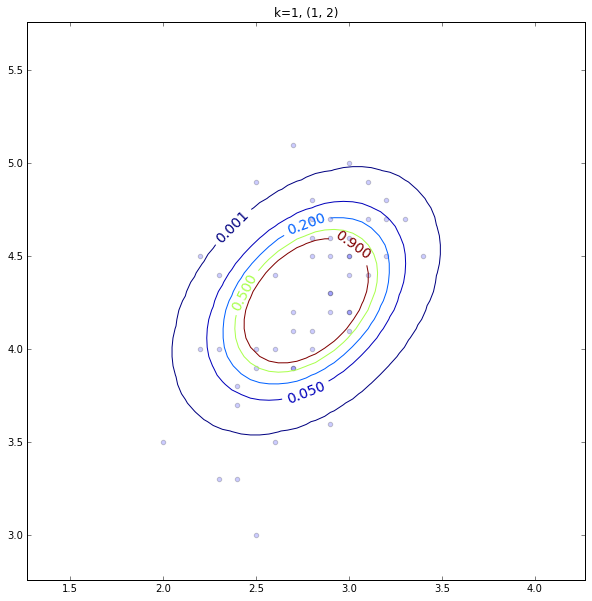

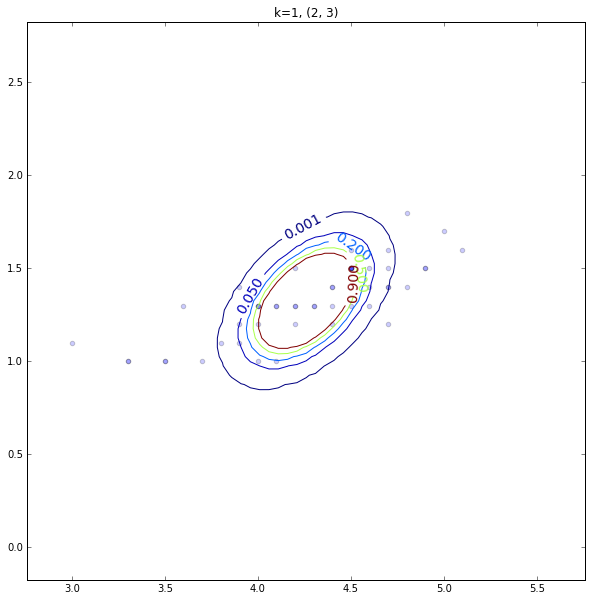

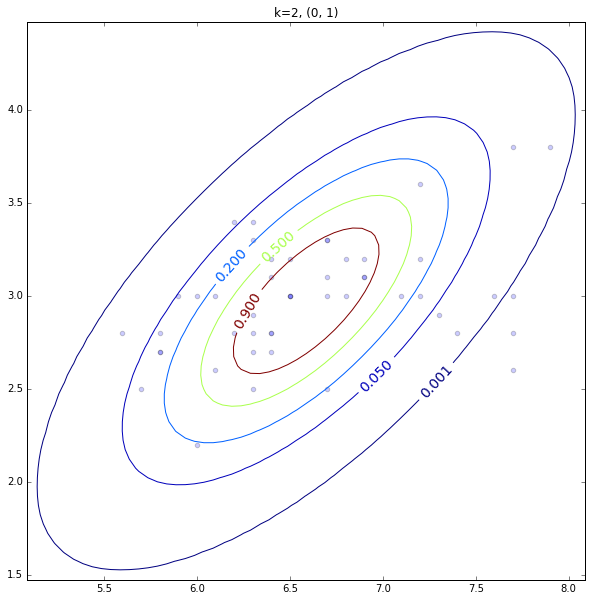

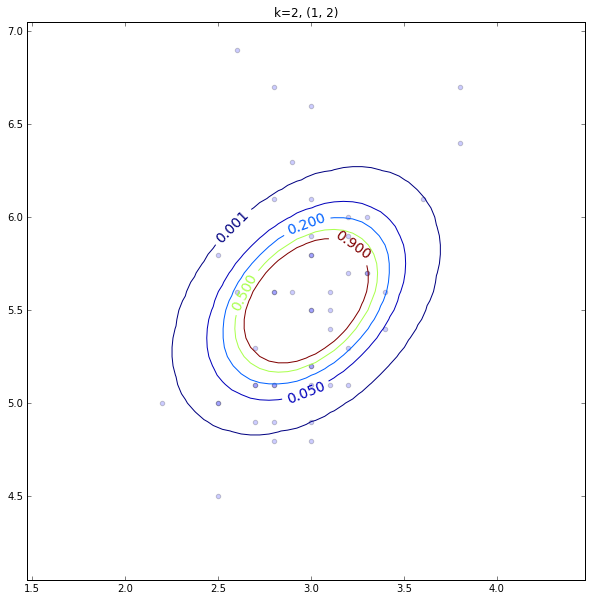

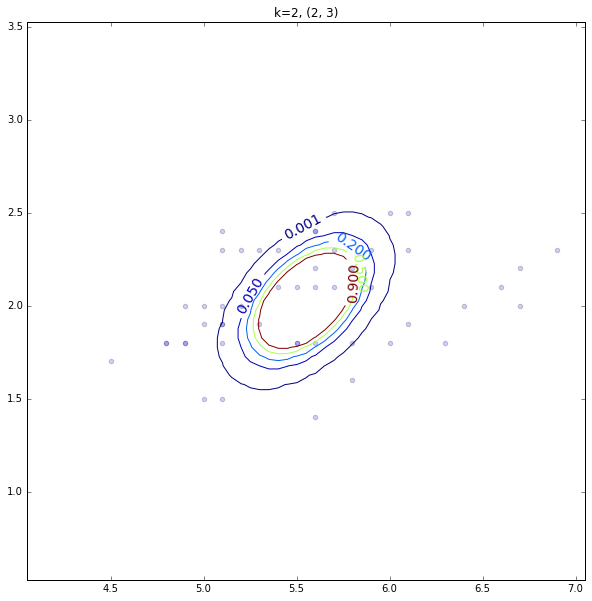

In [8]:
for k in range(3):
    for i in range(3):
        paintGraphic(
            As[k][i:i + 2],
            getSubMatrix(sigmas[0], i, i + 2),
            [datas[k][index][i] for index in range(N)],
            [datas[k][index][i + 1] for index in range(N)],
            k, i
        )

Что сказать, выборка более-менее ложится на плотность

In [9]:
# Оцениваем P(T = k)

sum1 = len([value for value in load_iris()["target"] if value == 0])
sum2 = len([value for value in load_iris()["target"] if value == 1])
sum3 = len([value for value in load_iris()["target"] if value == 2])
sum = len(load_iris()["target"])

p1 = sum1 / sum
p2 = sum2 / sum
p3 = sum3 / sum

print(p1, p2, p3)

0.3333333333333333 0.3333333333333333 0.3333333333333333


Выяснилось, что все $k$ равновероятны, т.к. их в выборке встречается равное количество.

$P(T = 0) = P(T = 1) = P(T = 2) = \frac{1}{3}$

In [10]:
# Новые матожи можно посчитать просто (у нас же равное кол-во элементов при разных k)

E = [(As[1] + As[2]) / 2, (As[0] + As[2]) / 2, (As[0] + As[1]) / 2]
E = np.array(E)
print(E)

[[ 6.262  2.872  4.906  1.676]
 [ 5.797  3.196  3.508  1.135]
 [ 5.471  3.094  2.862  0.785]]


In [11]:
def paintGraphics(As, sigmas):
    
    for k in range(3):
        for index in range(3):
            
            a1 = As[(k + 1) % 3][index:index + 2]
            a2 = As[(k + 2) % 3][index:index + 2]
            sigma1 = getSubMatrix(sigmas[(k + 1) % 3], index, index + 2)
            sigma2 = getSubMatrix(sigmas[(k + 2) % 3], index, index + 2)
            
            xData1 = np.array([datas[(k + 1) % 3][j][index] for j in range(N)])
            yData1 = np.array([datas[(k + 1) % 3][j][index + 1] for j in range(N)])
            xData2 = np.array([datas[(k + 2) % 3][j][index] for j in range(N)])
            yData2 = np.array([datas[(k + 2) % 3][j][index + 1] for j in range(N)])
                        
            radius = 10
            xmin, xmax = E[k][index] - radius, E[k][index] + radius,
            ymin, ymax = E[k][index + 1] - radius, E[k][index + 1] + radius

            # Чтобы выборка правилно ложилась на график плотности,
            # приходится передавать в scipy матрицу, отраженную отонситально побочной диагонали
            #sigma1 = modify(sigma1)
            #sigma2 = modify(sigma2)


            grid = np.mgrid[xmin:xmax:0.05, ymin:ymax:0.05]
            density = np.array([[
                        sps.multivariate_normal.pdf(
                                (grid[0, i, j], grid[1, i, j]), a1, cov=sigma1
                        ) + sps.multivariate_normal.pdf(
                                (grid[0, i, j], grid[1, i, j]), a2, cov=sigma2
                        ) / 2
                        for i in range(grid[0].shape[0])
                    ]
                    for j in range(grid[0].shape[1])
                ]
            )

            figure = plt.figure(figsize=(10,10))

            figure.add_subplot(1, 1, 1)
            CS = plt.contour(grid[0], grid[1], density, [0.001, 0.05, 0.2, 0.5, 0.9])  # Рисуем с линиями уровня
            plt.clabel(CS, fontsize=14, inline=1)

            plt.scatter(yData1 + 4, xData1 - 4, alpha=0.2)
            plt.scatter(yData2 + 4, xData2 - 4, alpha=0.2)


            plt.title(r"k={}, ({}, {})".format(k, index, index + 1))

            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            plt.show()

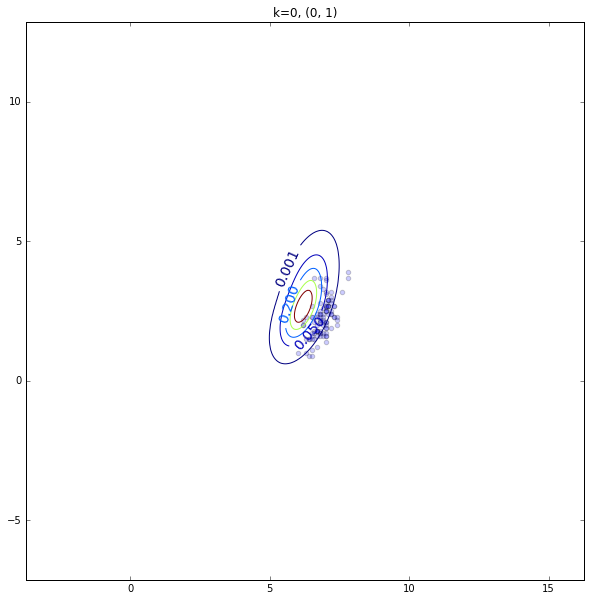

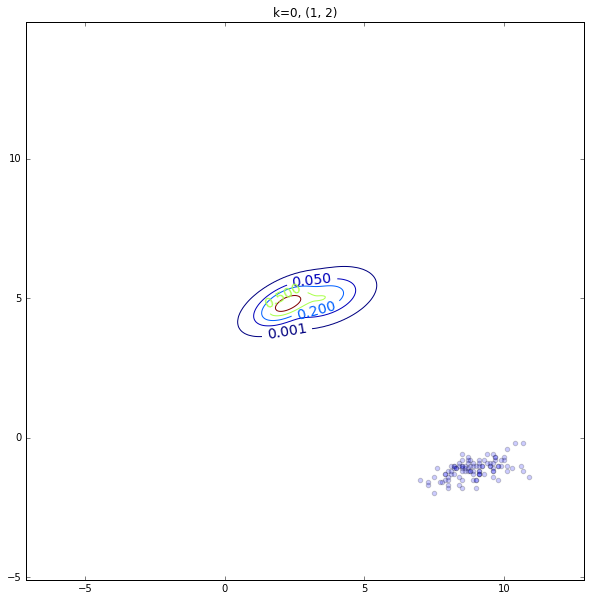

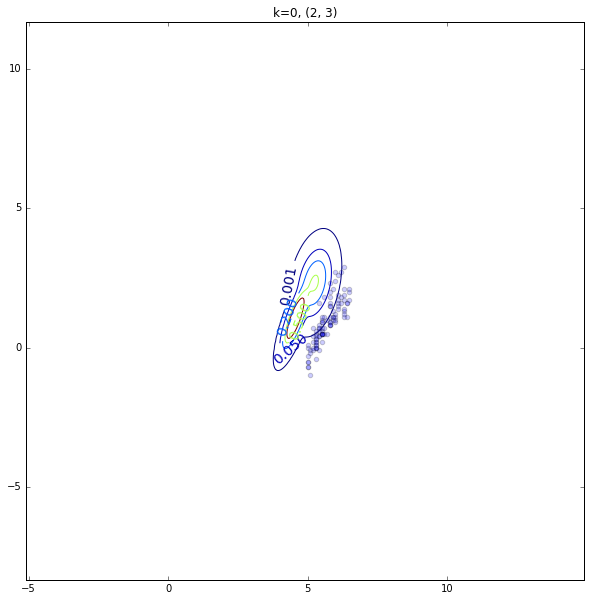

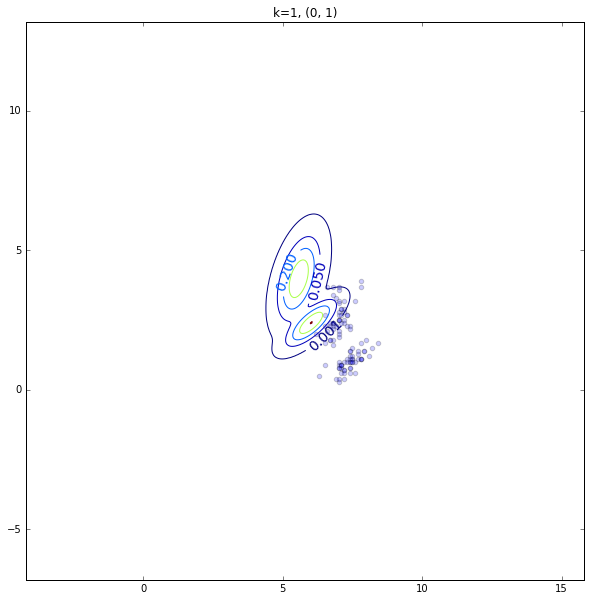

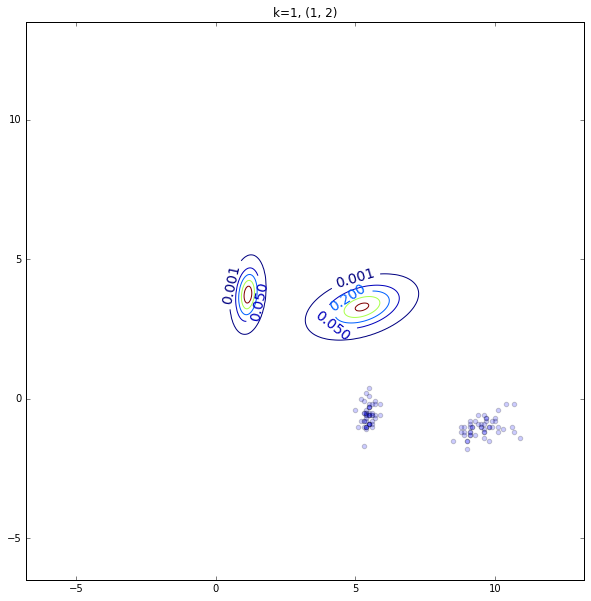

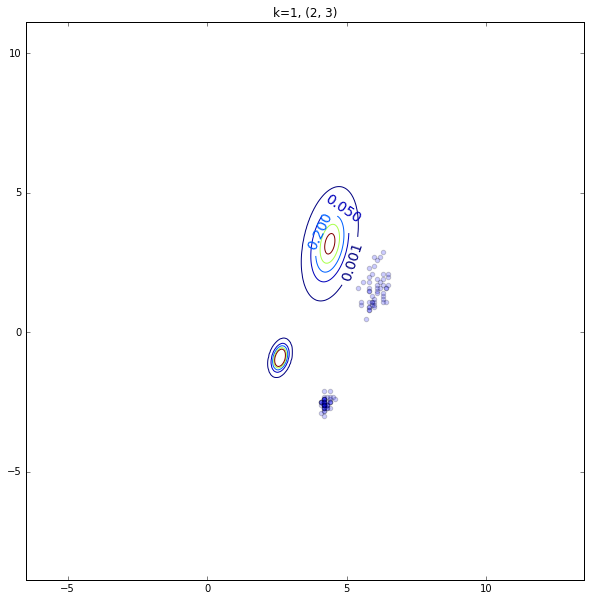

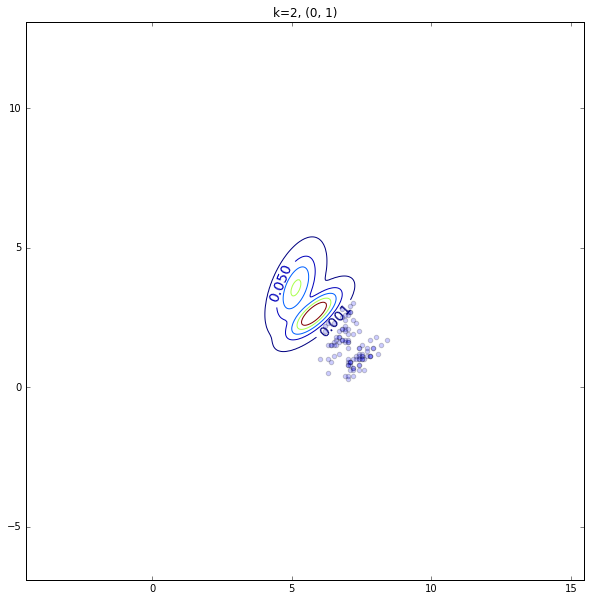

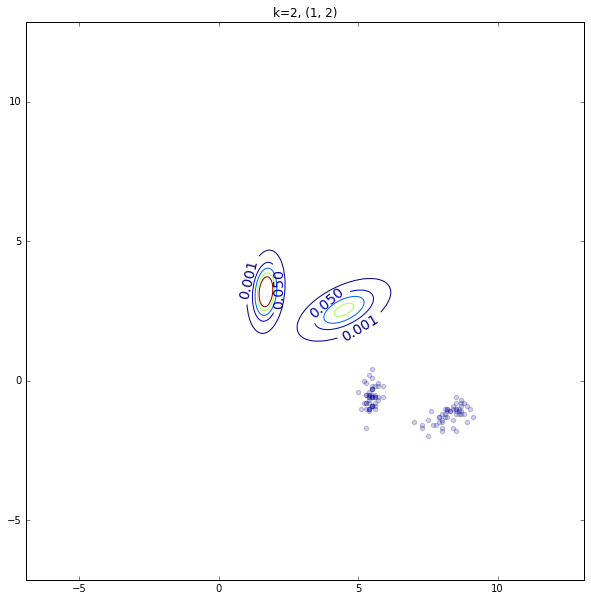

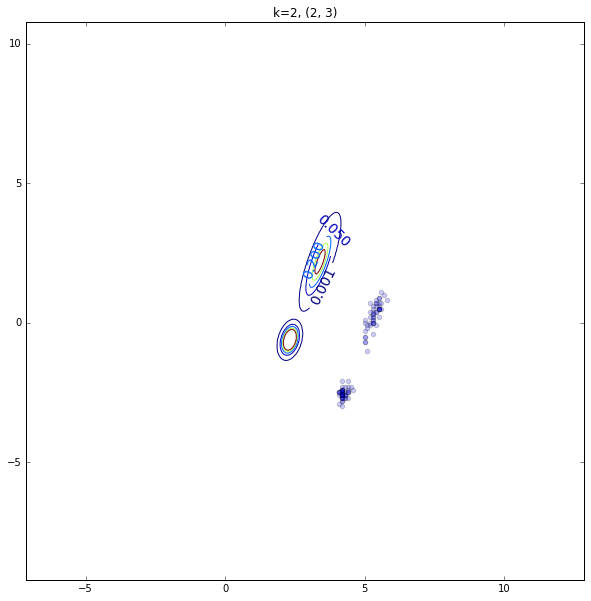

In [12]:
paintGraphics(As, sigmas)

Тут явно лажа. Я поменял местами x и y в выборке, если так сделать, видно, что форма выборки совпадает с плотностоью. Но между ними сдвиги, причем разные для разных графиков. Можно хотябы посмотреть на красивенькие графики плотностей. По ним видно, что это действительно "смеси" гауссовсках векторов.

Только что заупстил эту прогу второй раз заново. Оказалось, что сдвиги между плотностями и выборками стали другими. Учитывая, что данные те же, здесь творится что-то невероятное.